In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

## Data Preparation

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [3]:
!wget $data -O car-price.csv 

--2023-10-08 21:21:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘car-price.csv’

car-price.csv       100%[===================>]   1.41M  2.91MB/s    in 0.5s    

2023-10-08 21:21:03 (2.91 MB/s) - ‘car-price.csv’ saved [1475504/1475504]



In [12]:
df = pd.read_csv('car-price.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [13]:
#only these columns used for this homework
used_columns = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP'
]

In [15]:
# keep only the used columns
df = df[used_columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [16]:
#standarize column name
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [17]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [18]:
#handle missing value with 0
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [19]:
#rename "msrp" column to "price"
df.rename(columns={"msrp": "price"}, inplace=True)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [20]:
#Make the price binary (1 if above the average, 0 otherwise) 
price_mean = df.price.mean()

df['above_average'] = (df.price > price_mean).astype(int)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int64

#### Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution.


In [22]:
seed = 1

In [23]:
#split test data 20% and full train dataset 80%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [24]:
#split full train dataset to train and validation dataset 
# validation is 20% of whole data, so in full_train_dataset prespective means 20%/80% = 25%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

In [25]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0


In [28]:
df_val.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Nissan,370Z,2015,350.0,6.0,AUTOMATIC,Coupe,26,19,43290,1
1,Pontiac,Firebird,2000,305.0,8.0,UNKNOWN,2dr Hatchback,23,15,6175,0
2,Acura,RDX,2015,273.0,6.0,AUTOMATIC,4dr SUV,27,19,36495,0
3,Kia,Sedona,2016,276.0,6.0,AUTOMATIC,Passenger Minivan,24,18,26400,0
4,Nissan,Truck,1996,134.0,4.0,MANUAL,Regular Cab Pickup,24,19,2122,0


In [29]:
df_test.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Lotus,Evora 400,2017,400.0,6.0,MANUAL,Coupe,39,21,91900,1
1,Aston Martin,V8 Vantage,2014,420.0,8.0,AUTOMATED_MANUAL,Convertible,21,14,136900,1
2,Hyundai,Genesis,2015,311.0,6.0,AUTOMATIC,Sedan,29,18,38000,0
3,Suzuki,Samurai,1993,66.0,4.0,MANUAL,Convertible SUV,26,24,2000,0
4,Mitsubishi,Outlander,2015,166.0,4.0,AUTOMATIC,4dr SUV,29,24,26195,0


In [30]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [31]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['price']
del df_val['price']
del df_test['price']

## Question 1: ROC AUC feature importance
Which numerical variable (among the following 4) has the highest AUC?

* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg

In [34]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [35]:
numerical_cols = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical_cols = ['make','model','transmission_type','vehicle_style']

In [37]:
df_train['engine_hp']

0       280.0
1       300.0
2       259.0
3       280.0
4       283.0
        ...  
7143    148.0
7144    325.0
7145    130.0
7146    162.0
7147    240.0
Name: engine_hp, Length: 7148, dtype: float64

In [38]:
roc_auc_score(y_train, df_train['engine_hp'].values)

0.9171031265539011

In [56]:
scaler = MinMaxScaler()

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

for col in numerical_cols:
    y_pred = df_train[col].values
    #normalize data for make the values scale to 0-1 (mimic model output to statisfied probability axiom)
    y_pred = NormalizeData(y_pred)
    score = roc_auc_score(y_train, y_pred)
    
    #if score < 0.5 then its worse than random model, it might indicate the variable is negatively correlated with the target varialble
    #so here we invert the values by negating the values
    if(score < 0.5):
        y_pred = -df_train[col].values
        y_pred = NormalizeData(y_pred)
        score = roc_auc_score(y_train, y_pred)
    
    
    print('%s: %f ' % (col, score))

year: 0.687551 
engine_hp: 0.917103 
engine_cylinders: 0.766116 
highway_mpg: 0.633059 
city_mpg: 0.673424 


From the experiment **engine_hp** is the highest AUC

## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression 

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [76]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [77]:
val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred),3)

0.976

the AUC of this model on the validation dataset is 0.976 and the closest option is **0.979**

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

In [116]:
thresholds = np.linspace(0,1,101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [117]:
def get_confusion_table(threshold):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= threshold)
    predict_negative = (y_pred < threshold)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    return tp,tn,fp,fn;

In [118]:
scores = []

for t in thresholds:
    tp,tn,fp,fn = get_confusion_table(t)
    precision = tp / (fp + tp)
    recall = tp / (fn + tp)

    scores.append((t,tp, fp, fn, tn,precision,recall))

<ipython-input-118-636d83a82918>:5: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (fp + tp)


In [120]:
columns = ['threshold','tp', 'fp', 'fn', 'tn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,858,2,871,0.431788,0.996942
2,0.02,651,706,3,1023,0.479735,0.995413
3,0.03,651,622,3,1107,0.511390,0.995413
4,0.04,650,567,4,1162,0.534100,0.993884
...,...,...,...,...,...,...,...
96,0.96,251,1,403,1728,0.996032,0.383792
97,0.97,237,0,417,1729,1.000000,0.362385
98,0.98,214,0,440,1729,1.000000,0.327217
99,0.99,178,0,476,1729,1.000000,0.272171


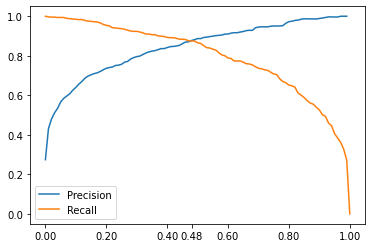

In [121]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
new_ticks = [0.0, 0.2,  0.4, 0.48,  0.6,0.8,1.0] 
plt.xticks(new_ticks)
plt.legend()

threshold precision and recall curves intersect is **0.48**

## Question 4: F1 score
Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [122]:
# p for precision
# r for recall
def compute_f1(p,r):
    return 2 * ((p*r)/(p+r))

In [123]:
f1_scores = []
for t in thresholds:
    tp,tn,fp,fn = get_confusion_table(t)
    precision = tp / (fp + tp)
    recall = tp / (fn + tp)
    f1 = compute_f1(precision,recall)
    
    f1_scores.append((t,f1))

<ipython-input-123-1292dec45523>:4: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (fp + tp)


In [124]:
columns = ['threshold', 'f1']
df_f1_scores = pd.DataFrame(f1_scores, columns=columns)
df_f1_scores.head()

,threshold,f1
0,0.00,0.430688
1,0.01,0.602588
2,0.02,0.647439
3,0.03,0.675662
4,0.04,0.694816


In [125]:
df_f1_scores.sort_values(by=['f1'], ascending=False)

,threshold,f1
49,0.49,0.877974
50,0.50,0.876161
48,0.48,0.875957
46,0.46,0.875569
51,0.51,0.874419
...,...,...
97,0.97,0.531987
98,0.98,0.493088
0,0.00,0.430688
99,0.99,0.427885


the maximal (and the closest with option) F1 is **0.48** 

## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

How large is standard devidation of the scores across different folds?

In [134]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [135]:
def predict(df, dv, model):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [127]:
!pip install tqdm

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [128]:
from tqdm.auto import tqdm

In [141]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    #get training and validation data based on k-fold indexes
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    #get target(y) values for train and val dataset
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    #train modelwith splitted dataset and then predict
    #use parameter based on "C" variable (here we check various "C" parameter values)
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    #calculate auc and append it to scores list
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('avg: %f , standard deviation: %f' % (np.mean(scores), np.std(scores)))


avg: 0.978801 , standard deviation: 0.001079


the standard devidation of the scores across different folds is 0.001 and it closest with **0.003** option

## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 0.5, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [145]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        #get training and validation data based on k-fold indexes
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        #get target(y) values for train and val dataset
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        #train modelwith splitted dataset and then predict
        #use parameter based on "C" variable (here we check various "C" parameter values)
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        #calculate auc and append it to scores list
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s mean:%.3f std: +- %.3f' % (C, round(np.mean(scores),3), round(np.std(scores),3)))

C=0.01 mean:0.952 std: +- 0.002
C=0.1 mean:0.972 std: +- 0.002
C=0.5 mean:0.979 std: +- 0.003
C=10 mean:0.981 std: +- 0.002



The best mean score is when parameter **C = 10**